# 🏭 Carbon Majors Emissions Data Analysis and Modeling 🌍

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from sklearn.preprocessing import PowerTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

In [30]:
df = pd.read_csv(r'C:\Users\hp\Documents\Python project(github)\emissions_high_granularity.csv\emissions_high_granularity.csv')


In [32]:
df.head()

,year,parent_entity,parent_type,reporting_entity,commodity,production_value,production_unit,product_emissions_MtCO2,flaring_emissions_MtCO2,venting_emissions_MtCO2,own_fuel_use_emissions_MtCO2,fugitive_methane_emissions_MtCO2e,fugitive_methane_emissions_MtCH4,total_operational_emissions_MtCO2e,total_emissions_MtCO2e,source
0,1962,Abu Dhabi National Oil Company,State-owned Entity,Abu Dhabi,Oil & NGL,0.9125,Million bbl/yr,0.338928,0.005404,0.001299,0.0,0.018254,0.000652,0.024957,0.363885,Abu Dhabi National Oil Company Annual Report 1...
1,1963,Abu Dhabi National Oil Company,State-owned Entity,Abu Dhabi,Oil & NGL,1.8250,Million bbl/yr,0.677855,0.010808,0.002598,0.0,0.036508,0.001304,0.049914,0.727770,Abu Dhabi National Oil Company Annual Report 1...
2,1964,Abu Dhabi National Oil Company,State-owned Entity,Abu Dhabi,Oil & NGL,7.3000,Million bbl/yr,2.711422,0.043233,0.010392,0.0,0.146033,0.005215,0.199657,2.911079,Abu Dhabi National Oil Company Annual Report 1...
3,1965,Abu Dhabi National Oil Company,State-owned Entity,Abu Dhabi,Oil & NGL,10.9500,Million bbl/yr,4.067132,0.064849,0.015588,0.0,0.219049,0.007823,0.299486,4.366618,Abu Dhabi National Oil Company Annual Report 1...
4,1966,Abu Dhabi National Oil Company,State-owned Entity,Abu Dhabi,Oil & NGL,13.5050,Million bbl/yr,5.016130,0.079980,0.019225,0.0,0.270160,0.009649,0.369366,5.385495,Abu Dhabi National Oil Company Annual Report 1...


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15797 entries, 0 to 15796
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   year                                15797 non-null  int64  
 1   parent_entity                       15797 non-null  object 
 2   parent_type                         15797 non-null  object 
 3   reporting_entity                    15797 non-null  object 
 4   commodity                           15797 non-null  object 
 5   production_value                    15797 non-null  float64
 6   production_unit                     15797 non-null  object 
 7   product_emissions_MtCO2             15797 non-null  float64
 8   flaring_emissions_MtCO2             15797 non-null  float64
 9   venting_emissions_MtCO2             15797 non-null  float64
 10  own_fuel_use_emissions_MtCO2        15797 non-null  float64
 11  fugitive_methane_emissions_MtCO2e   15797

In [36]:
df.describe()

,year,production_value,product_emissions_MtCO2,flaring_emissions_MtCO2,venting_emissions_MtCO2,own_fuel_use_emissions_MtCO2,fugitive_methane_emissions_MtCO2e,fugitive_methane_emissions_MtCH4,total_operational_emissions_MtCO2e,total_emissions_MtCO2e
count,15797.000000,15797.000000,15797.000000,15797.000000,15797.000000,15797.000000,15797.000000,15797.000000,15797.000000,15797.000000
mean,1985.827942,327.879634,79.391514,0.517226,0.462462,0.688676,8.884203,0.317293,10.552566,89.944080
std,28.664256,1188.625001,261.984080,1.783744,1.804575,3.564171,31.358244,1.119937,34.790479,292.843491
min,1854.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1970.000000,11.800000,5.996490,0.000000,0.000000,0.000000,0.607068,0.021681,0.751999,7.208860
50%,1993.000000,59.970871,21.502409,0.015913,0.045247,0.000000,2.351126,0.083969,2.869611,25.116721
75%,2007.000000,246.375000,62.191954,0.197253,0.329719,0.162415,7.401655,0.264345,8.965620,72.255340
max,2022.000000,27192.000000,7769.222235,27.026872,41.458662,83.203465,877.683714,31.345847,877.683714,8646.905949


In [38]:
df.shape

(15797, 16)

# 📊 Data Preprocessing

In [41]:
df.isnull().sum()

year                                  0
parent_entity                         0
parent_type                           0
reporting_entity                      0
commodity                             0
production_value                      0
production_unit                       0
product_emissions_MtCO2               0
flaring_emissions_MtCO2               0
venting_emissions_MtCO2               0
own_fuel_use_emissions_MtCO2          0
fugitive_methane_emissions_MtCO2e     0
fugitive_methane_emissions_MtCH4      0
total_operational_emissions_MtCO2e    0
total_emissions_MtCO2e                0
source                                0
dtype: int64

In [43]:
# Handle Duplicates
duplicates = df.duplicated().sum()
print(f'Duplicates: {duplicates}')

Duplicates: 0


In [45]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[numeric_columns] < (Q1 - 1.5 * IQR)) |(df[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [47]:
# Check Normalization
stat, p = shapiro(df['production_value'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

if p < 0.05:
    transformer = PowerTransformer()
    df['production_value'] = transformer.fit_transform(df[['production_value']])

Statistics=0.836, p=0.000


C:\Users\hp\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8876.
  res = hypotest_fun_out(*samples, **kwds)


# 📈 Exploratory Data Analysis (EDA)

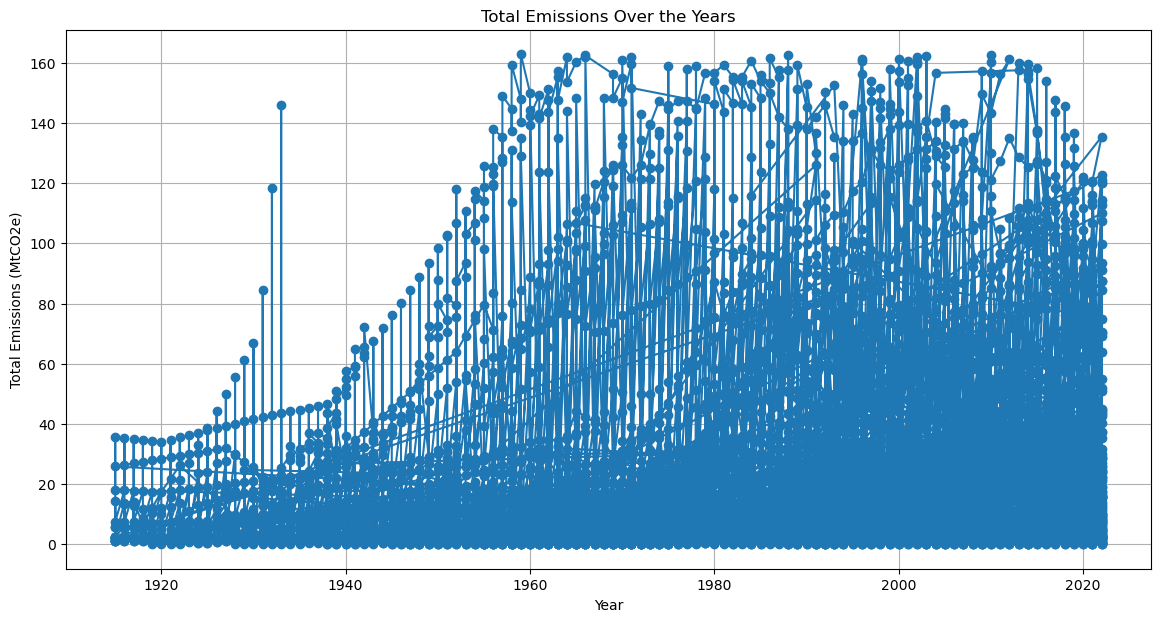

In [50]:
# Line Plot for Trends over Years
plt.figure(figsize=(14, 7))
plt.plot(df['year'], df['total_emissions_MtCO2e'], marker='o', linestyle='-')
plt.title('Total Emissions Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Emissions (MtCO2e)')
plt.grid(True)
plt.show()

#### Short Interpretation¶
##### The line plot shows a clear upward trend in total emissions (MtCO2e) from the early 1900s to 2020.

##### Pre-1940s: Emissions were relatively low and sporadic.
##### 1940s to 1980s: There was a steady increase in emissions, indicating industrial growth.
##### 1980s to 2020: Emissions continued to rise significantly, with higher and more frequent spikes, reflecting rapid industrialization and economic growth globally.
##### Overall, the plot highlights a significant increase in emissions over the past century.

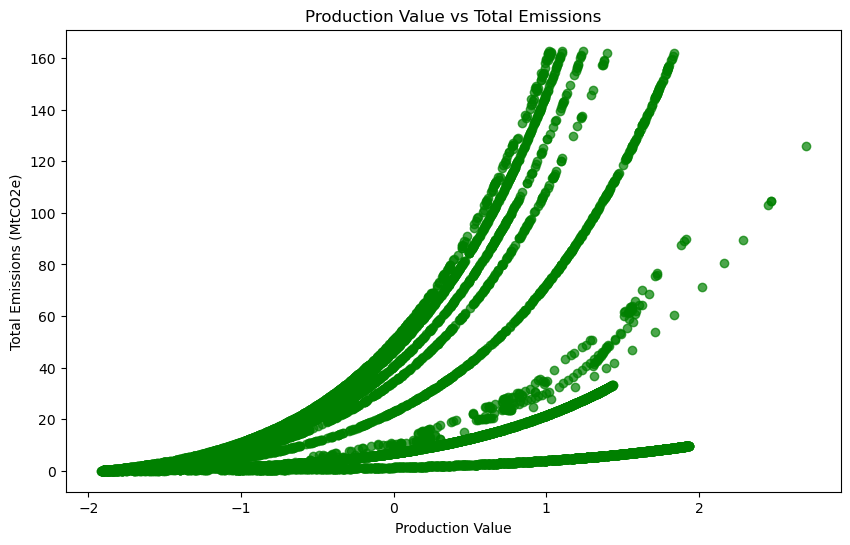

In [55]:
# Scatter Plot for Production Value vs Total Emissions
plt.figure(figsize=(10, 6))
plt.scatter(df['production_value'], df['total_emissions_MtCO2e'], alpha=0.7, color='g')
plt.title('Production Value vs Total Emissions')
plt.xlabel('Production Value')
plt.ylabel('Total Emissions (MtCO2e)')
plt.show()

#### Short Interpretation¶
##### The scatter plot illustrates the relationship between production value and total emissions (MtCO2e). Here are the key observations:

##### Positive Correlation: There is a clear positive correlation between production value and total emissions. As production value increases, total emissions also tend to increase.
##### Curved Relationship: The data points form a curved pattern, suggesting a non-linear relationship where emissions rise more sharply at higher production values.
##### Clusters of Data: The plot shows distinct clusters of data points, indicating groups of entities with similar production values and emissions levels.
##### Overall, the plot highlights that higher production values are associated with significantly higher total emissions.

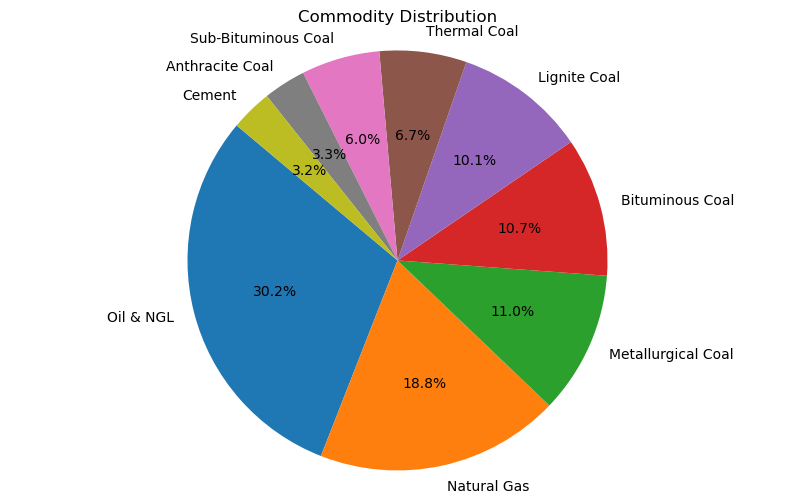

In [59]:
# Pie Chart for Commodity Distribution
commodity_counts = df['commodity'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(commodity_counts, labels=commodity_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Commodity Distribution')
plt.axis('equal')
plt.show()


#### Short Interpretation¶
##### The pie chart illustrates the distribution of different commodities. Here are the key observations:

##### Oil & NGL: Represents the largest share at 30.2% of the total commodity distribution.
##### Natural Gas: Accounts for 18.8%, making it the second largest commodity.
##### Metallurgical Coal: Holds 11.0% of the distribution.
##### Bituminous Coal: Comprises 10.7% of the commodities.
##### Lignite Coal: Makes up 10.1% of the distribution.
##### Other Commodities: Include Thermal Coal, Sub-Bituminous Coal, Anthracite Coal, Cement, and Sub-Bituminous Coal, each with smaller shares ranging from 3.2% to 6.7%.
##### Overall, the chart highlights that Oil & NGL and Natural Gas are the predominant commodities in the distribution.

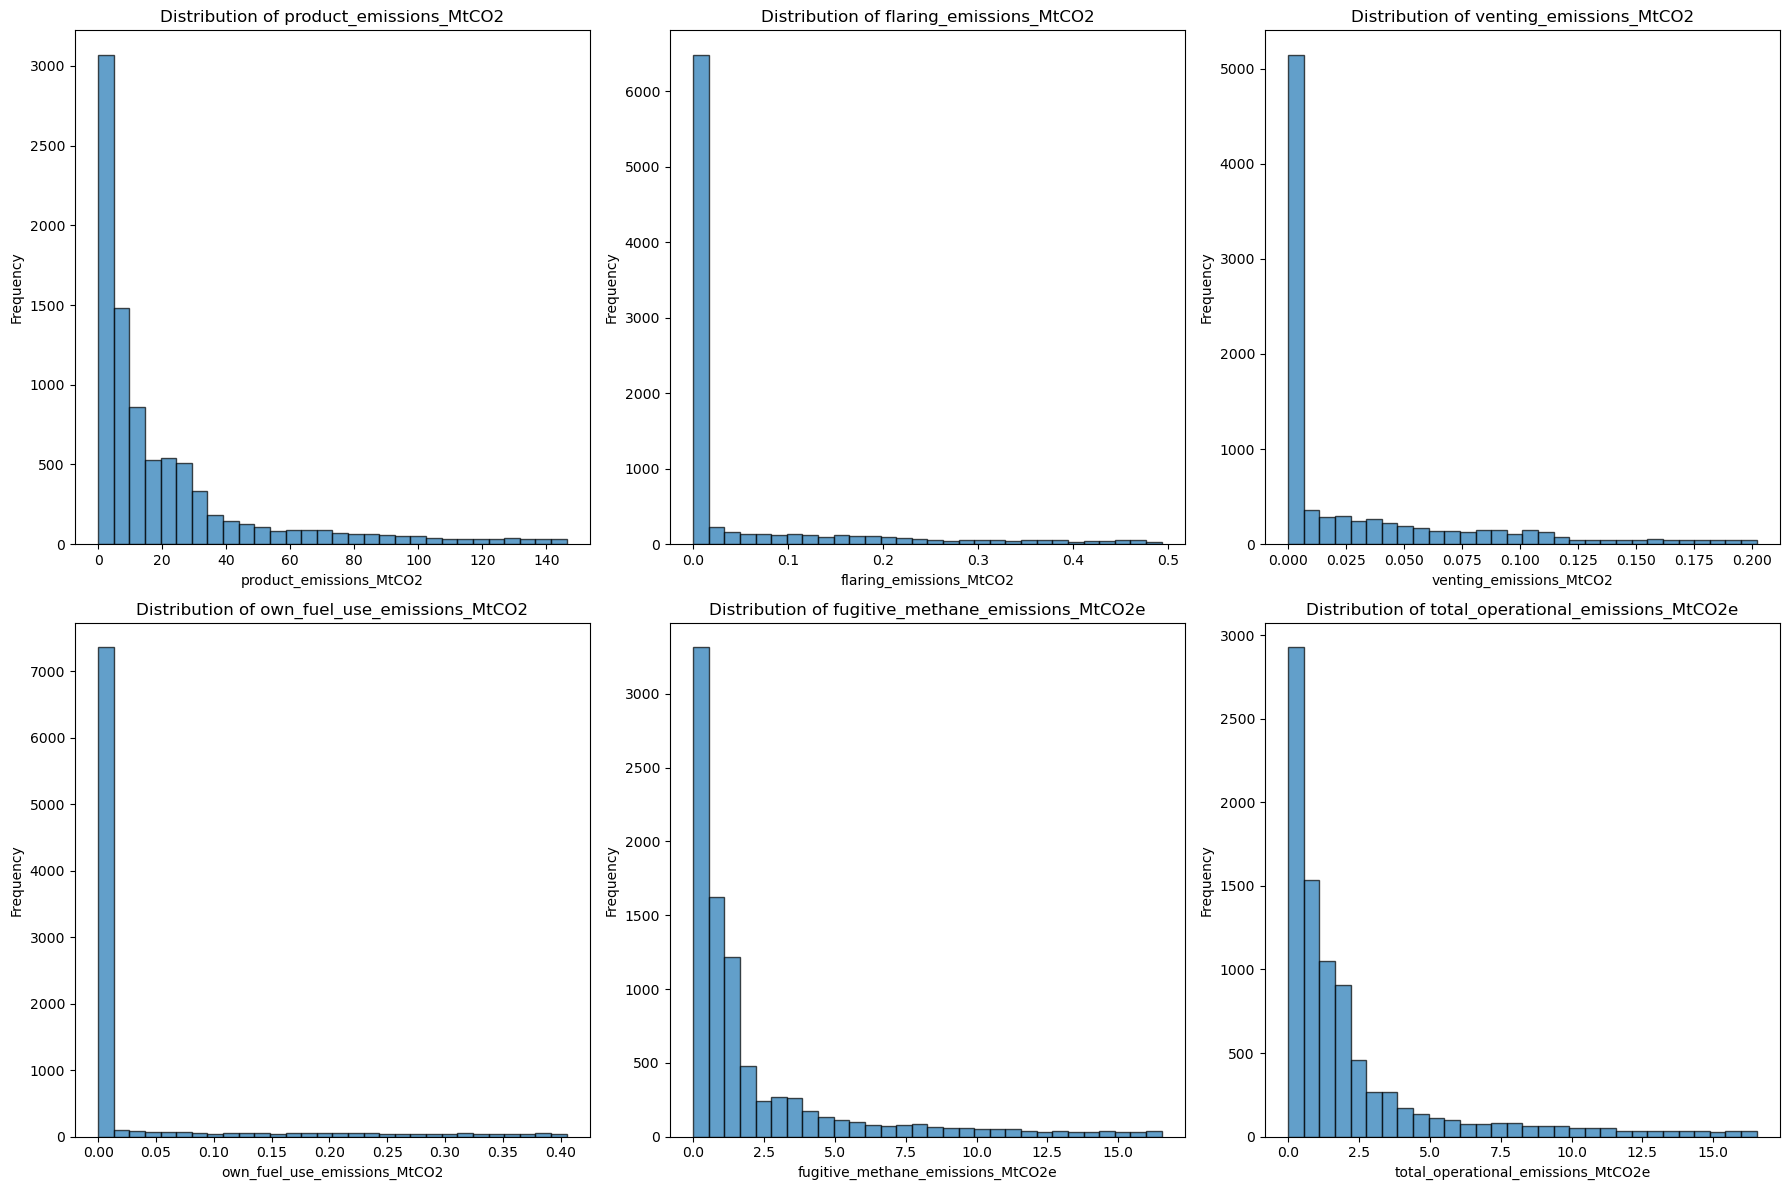

In [62]:
# Histograms for Emission Types in Subplots
emissions_columns = ['product_emissions_MtCO2', 'flaring_emissions_MtCO2', 'venting_emissions_MtCO2', 
                     'own_fuel_use_emissions_MtCO2', 'fugitive_methane_emissions_MtCO2e', 'total_operational_emissions_MtCO2e']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(emissions_columns):
    axes[i].hist(df[col], bins=30, edgecolor='k', alpha=0.7)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


#### Short Interpretation¶
#### 1.Product Emissions:
##### Most values are clustered between 0 and 20 MtCO2, with a long tail extending to higher values.
#### 2.Flaring Emissions:
##### Predominantly low values, mostly concentrated around 0 MtCO2, with very few instances exceeding 0.1 MtCO2.
#### 3.Venting Emissions:
##### Similar to flaring emissions, values are mostly close to 0 MtCO2, with few occurrences above 0.05 MtCO2.
#### 4.Own Fuel Use Emissions:
##### Almost all values are close to 0 MtCO2, indicating minimal emissions from own fuel use.
#### 5.Fugitive Methane Emissions:
##### The majority of values are below 2.5 MtCO2e, with some extending up to 15 MtCO2e.
#### 6.Total Operational Emissions:
##### The distribution is skewed towards lower values, with most emissions below 2.5 MtCO2e and a long tail up to 15 MtCO2e.
##### Overall, the histograms reveal that emissions are generally low for most types, with a few high-emission outliers.

In [ ]:
# Ensure only numeric columns are included for the correlation matrix
numeric_df = df.select_dtypes(include=[np.number])

# Correlation matrix heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

#### Here's a simplified interpretation of the correlation matrix heatmap:
##### Strong Relationships:
###### Product emissions have a strong relationship with both fugitive methane emissions and total operational emissions. When one increases, the others tend to increase as well.
###### Own fuel use emissions and venting emissions are also closely related.
##### Moderate Relationships:
###### Production value shows a moderate relationship with own fuel use emissions and venting emissions.
##### Weak or Negative Relationships:
###### Some pairs of variables, like flaring emissions with others, have weak or even negative relationships, meaning they don't strongly affect each other.
###### In summary, the heatmap shows that some types of emissions are closely linked, especially product_emissions_MtCO2, fugitive_methane_emissions_MtCO2e, and total_operational_emissions_MtCO2e

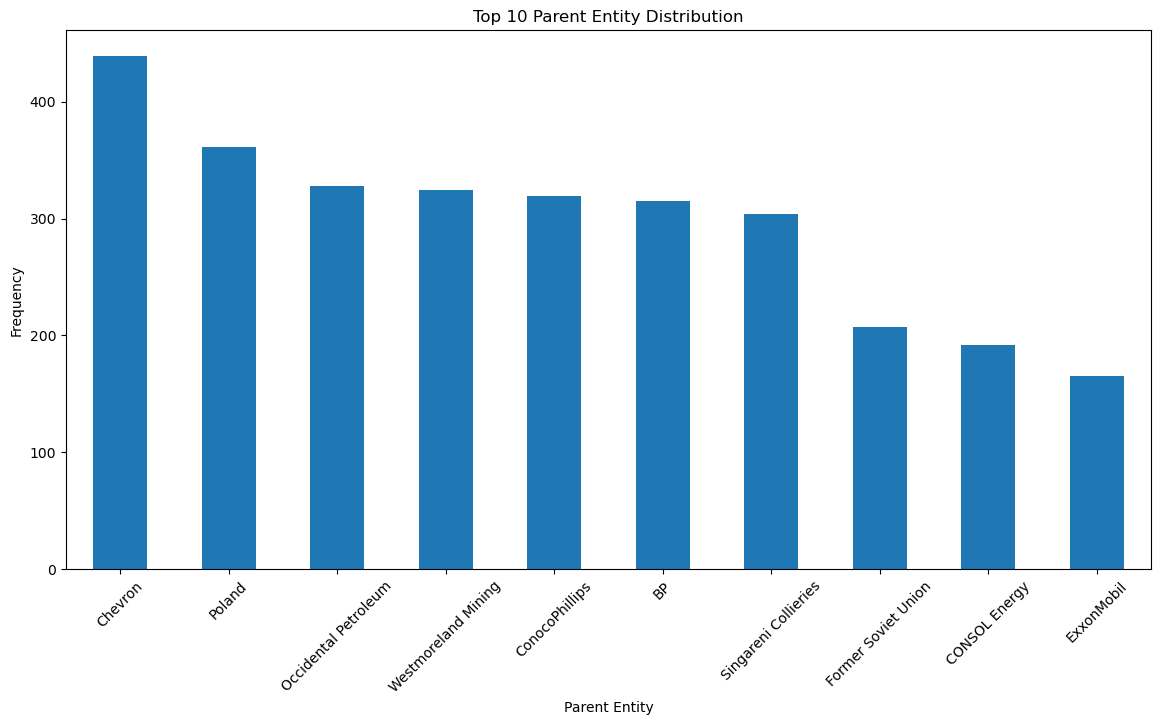

In [70]:
# Bar Plot for Parent Entity Distribution
parent_entity_counts = df['parent_entity'].value_counts().head(10)  # Top 10 entities
plt.figure(figsize=(14, 7))
parent_entity_counts.plot(kind='bar')
plt.title('Top 10 Parent Entity Distribution')
plt.xlabel('Parent Entity')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

#### The bar plot displays the distribution of the top 10 parent entities based on frequency. Here are the key observations:
##### Chevron is the most common entity in the dataset.
##### Poland, Occidental Petroleum, Westmoreland Mining, Conocophillips, BP, Singareni Collieries all have similar counts, making them important too.
##### Former Soviet Union, CONSOL Energy, and ExxonMobil are less frequent but still among the top 10.
##### In short, Chevron is the most prominent, with a mix of other major companies also showing strong presence.

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 64.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 97.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 98.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 98.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 97.8% of the points cannot be plac

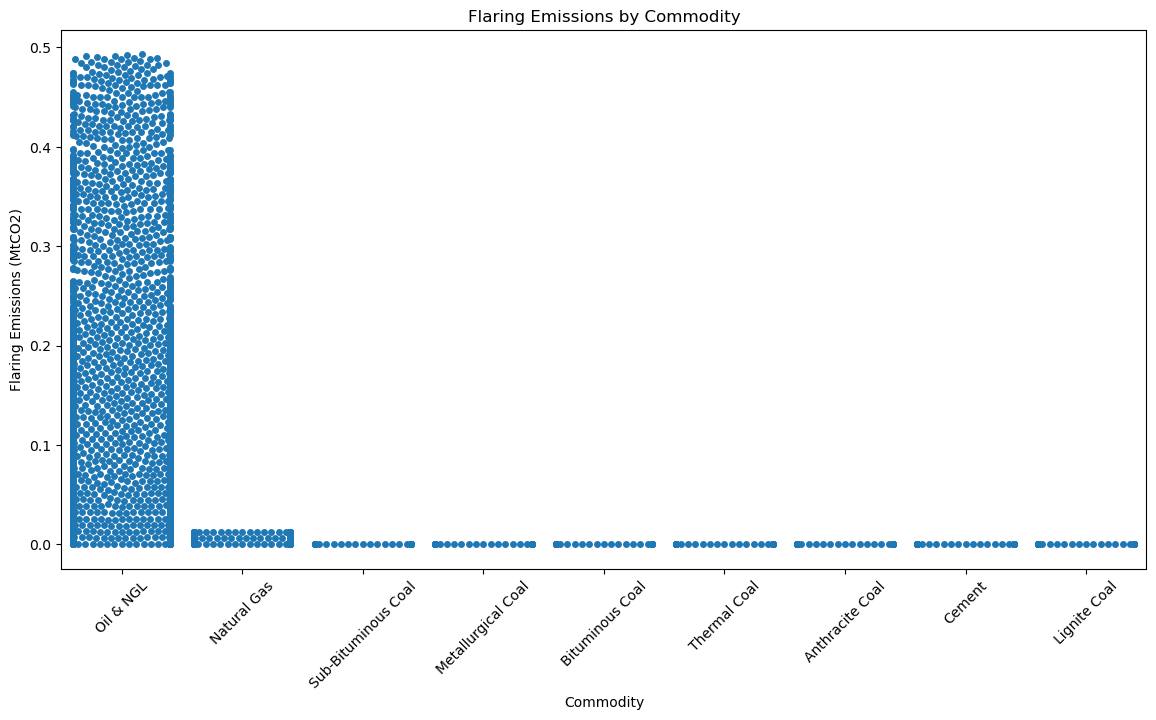

In [73]:
# Swarm Plot for Flaring Emissions by Commodity
plt.figure(figsize=(14, 7))
sns.swarmplot(x='commodity', y='flaring_emissions_MtCO2', data=df)
plt.title('Flaring Emissions by Commodity')
plt.xlabel('Commodity')
plt.ylabel('Flaring Emissions (MtCO2)')
plt.xticks(rotation=45)
plt.show()

##### The swarm plot displays the distribution of flaring emissions (MtCO2) by different commodities. Here are the key observations:

#### Oil & NGL: 
##### This commodity has the highest flaring emissions, with values ranging from 0 to 0.5 MtCO2. The data points are densely packed, indicating frequent flaring emissions in this category.
#### Natural Gas:
##### Shows flaring emissions close to 0 MtCO2, with very few instances of higher emissions.
#### Other Commodities: 
##### Sub-Bituminous Coal, Metallurgical Coal, Bituminous Coal, Thermal Coal, Anthracite Coal, Cement, and Lignite Coal all have minimal to no flaring emissions, with values clustered around 0 MtCO2.
##### Overall, the plot highlights that Oil & NGL is the predominant source of flaring emissions, whereas other commodities contribute negligibly.

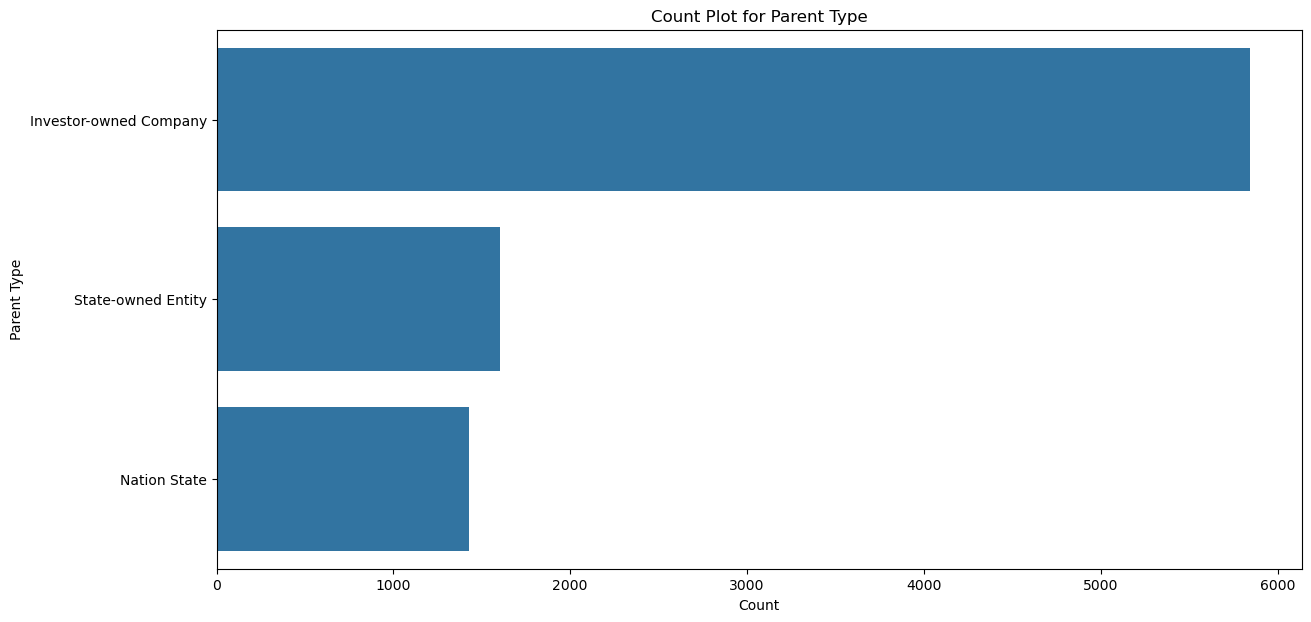

In [76]:
# Count Plot for Parent Type
plt.figure(figsize=(14, 7))
sns.countplot(y='parent_type', data=df, order=df['parent_type'].value_counts().index)
plt.title('Count Plot for Parent Type')
plt.xlabel('Count')
plt.ylabel('Parent Type')
plt.show()


##### The count plot displays the distribution of different parent types in the dataset. Here are the key observations:

#### Investor-owned Company: 
##### This is the most common parent type, with a significantly higher count compared to other types.
#### State-owned Entity: 
##### The second most common parent type, though with considerably fewer instances than investor-owned companies.
#### Nation State: 
##### The least common parent type among the three, with the lowest count.
##### Overall, the plot highlights that investor-owned companies dominate the dataset, followed by state-owned entities and nation states.

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


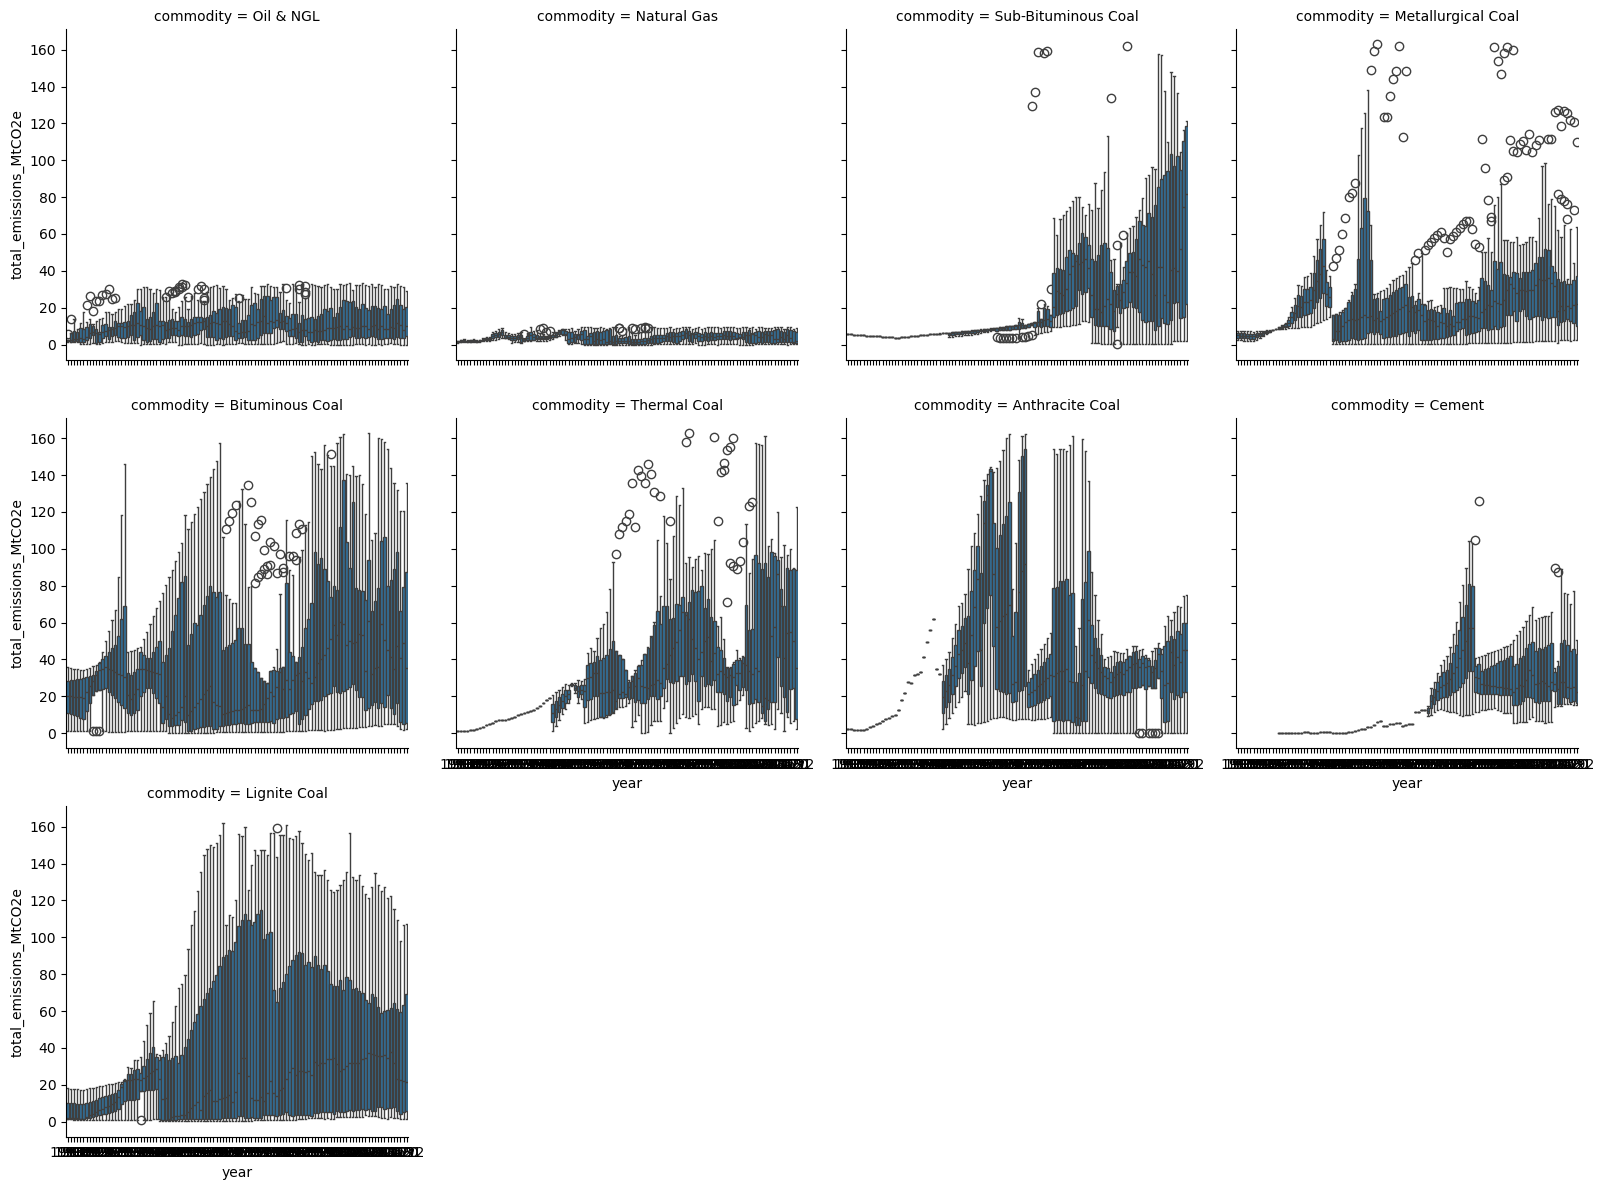

In [80]:
# Facet Grid for Emissions by Year and Commodity
g = sns.FacetGrid(df, col='commodity', col_wrap=4, height=4)
g.map(sns.boxplot, 'year', 'total_emissions_MtCO2e')
g.add_legend()
plt.show()

##### The facet grid displays the distribution of total emissions (MtCO2e) by year for each commodity. Here are the key observations:

#### Oil & NGL:
##### Shows relatively consistent emissions over the years, with some variability but generally lower compared to coal commodities.
#### Natural Gas:
##### Exhibits low emissions with little variation over the years.
#### Sub-Bituminous Coal, Metallurgical Coal, Bituminous Coal, Thermal Coal, Anthracite Coal, Lignite Coal: 
##### These coal commodities display significant variability in emissions, with noticeable increases in certain periods. The emissions for these commodities are generally higher and show distinct peaks.
#### Cement: 
##### Has moderate emissions with some variability over the years.
##### Overall, the plot highlights that coal commodities have the highest and most variable emissions, while oil & NGL and natural gas have relatively lower and more consistent emissions

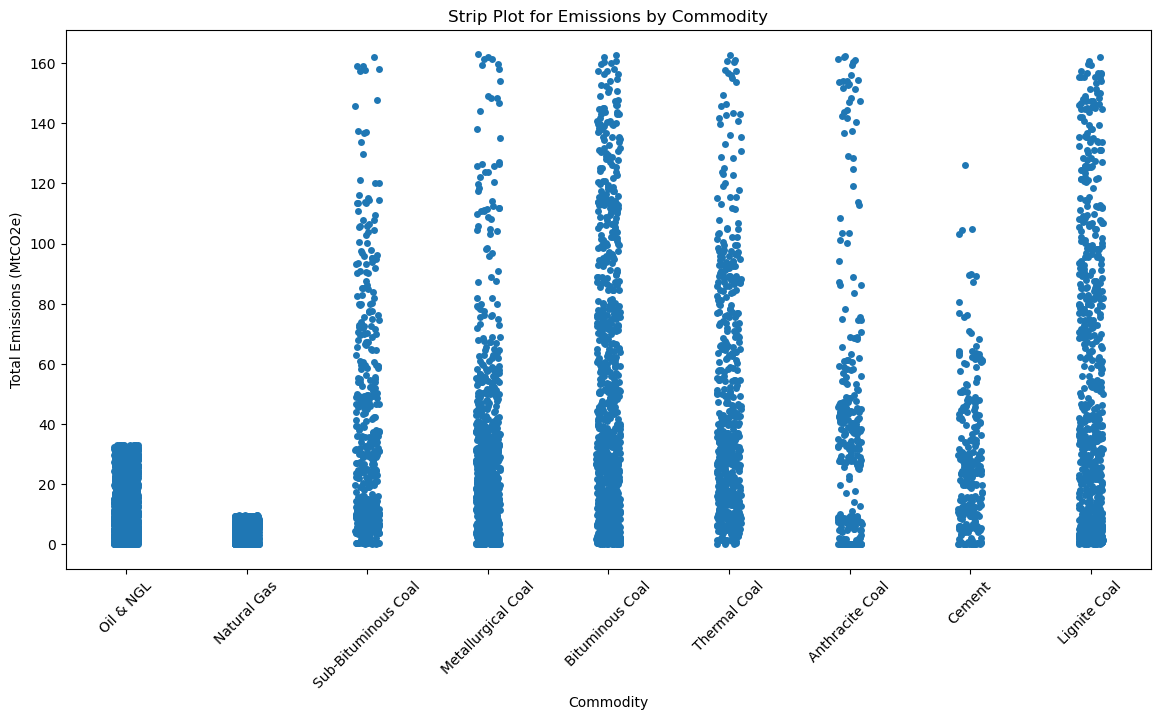

In [88]:
# Strip Plot for Emissions by Commodity
plt.figure(figsize=(14, 7))
sns.stripplot(x='commodity', y='total_emissions_MtCO2e', data=df, jitter=True)
plt.title('Strip Plot for Emissions by Commodity')
plt.xlabel('Commodity')
plt.ylabel('Total Emissions (MtCO2e)')
plt.xticks(rotation=45)
plt.show()

##### The strip plot displays the distribution of total emissions (MtCO2e) by different commodities. Here are the key observations:

#### Oil & NGL: Exhibits a relatively lower range of emissions, mostly below 40 MtCO2e.
#### Natural Gas: Shows even lower emissions, with values clustered around 0 to 20 MtCO2e.
#### Sub-Bituminous Coal, Metallurgical Coal, Bituminous Coal, Thermal Coal, Anthracite Coal, Lignite Coal: These coal commodities have a wide range of emissions, often reaching up to 160 MtCO2e, indicating higher and more variable emissions compared to other commodities.
#### Cement: Displays moderate emissions, with values spread across a smaller range compared to coal commodities.
#### Overall, the plot highlights that coal commodities are the major contributors to higher emissions, whereas oil & NGL and natural gas have relatively lower emissions.

In [92]:
# Data Preprocessing
df = pd.get_dummies(df, columns=['parent_entity', 'parent_type', 'reporting_entity', 'commodity', 'production_unit', 'source'], drop_first=True)

# 🏋️‍♂️ Model Training

In [98]:
# Train-Test Split
X = df.drop(columns=['year', 'total_emissions_MtCO2e'])
y = df['total_emissions_MtCO2e']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [100]:
# Model Training and Evaluation
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 📊 Model Evaluation 

In [102]:
# Evaluation Metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 0.022874018910123705
Mean Absolute Error: 0.02877789034583375
R-squared: 0.9999780761437326
Root Mean Squared Error: 0.15124159120468056


In [ ]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.xlabel('Actual Emissions')
plt.ylabel('Predicted Emissions')
plt.title('Actual vs Predicted Emissions')
plt.show()

#### The plot compares the actual emissions with the predicted emissions. Here are the key observations:

#### Linear Relationship:
##### The points lie almost perfectly along the diagonal line, indicating a strong linear relationship between actual and predicted values.
#### High Accuracy: 
##### The close alignment of points with the diagonal suggests that the model predicts emissions with high accuracy.
#### Minimal Deviation: 
##### There is minimal deviation from the diagonal, highlighting that the predicted emissions closely match the actual emissions across the entire range.
##### Overall, the plot demonstrates that the model performs exceptionally well in predicting emissions, with high accuracy and minimal errors.

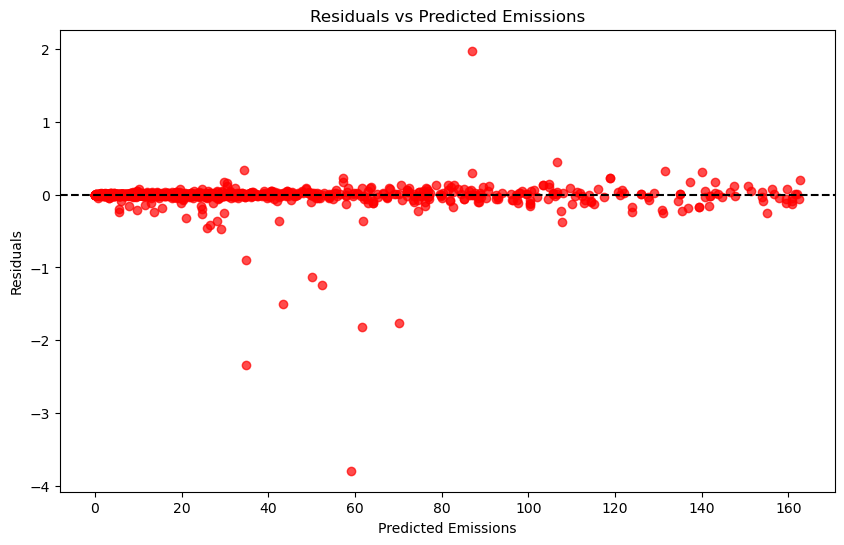

In [108]:
# Residuals Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7, color='r')
plt.xlabel('Predicted Emissions')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Emissions')
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

##### The plot displays the residuals (differences between actual and predicted values) against the predicted emissions. Here are the key observations:

#### Centered Residuals: 
##### Most of the residuals are centered around 0, indicating that the model's predictions are generally accurate.
#### No Clear Pattern:
##### The residuals do not show any clear pattern or trend, suggesting that the model does not suffer from heteroscedasticity (changing variability).
#### Outliers: 
##### There are some residuals that deviate significantly from 0, indicating the presence of outliers or instances where the model's predictions were less accurate.
##### Overall, the plot suggests that the model performs well, with residuals mostly centered around 0 and no evident pattern, though there are a few outliers.